<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/PMdarimapib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.6MB/s 
     |████████████████████████████████| 9.5MB 22.7MB/s 
     |████████████████████████████████| 2.1MB 59.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [13]:
import pmdarima as pm
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccpib.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['pib'] = dfa['pib']
df['pib'] = pd.to_numeric(df['pib'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

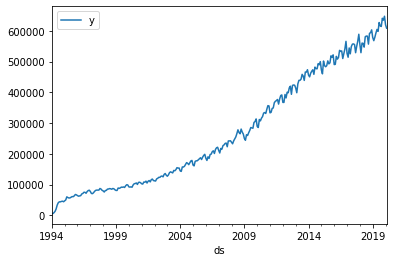

In [49]:
df.plot()

In [50]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.9375150711205867, True)

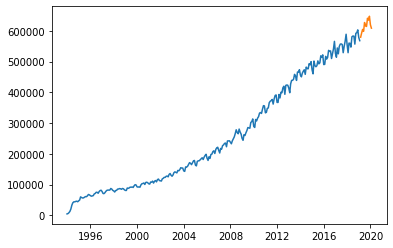

In [51]:
train = df.iloc[:-12].copy()  
test =  df.iloc[-12:].copy() 
plt.plot(train) 
plt.plot(test)

In [52]:
model = pm.auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_q=5, max_d=5, start_P=0, D=1, start_Q=0, max_P=5, 
                      max_Q=5, max_D=5, seasonal= True, m= 12, error_action = 'warn', trace = True, supress_warnings=True, stepwise=True, 
                      random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6009.736, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5947.725, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5894.543, Time=0.27 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5952.594, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5894.009, Time=0.46 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5922.621, Time=0.23 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=5893.685, Time=1.24 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5903.870, Time=0.71 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=5894.703, Time=2.68 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=5895.826, Time=2.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5893.857, Time=1.49 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=5900.745, Time=1.31 sec
 ARIMA(0,1,1)(3,1,2)[12]             : AIC=5897.504, Time=4.49 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=5946.873, Time=0.94 sec
 ARIMA(1,1,1)(2,1,1

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  302
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2938.928
Date:                              Tue, 02 Feb 2021   AIC                           5887.856
Time:                                      19:12:59   BIC                           5906.188
Sample:                                           0   HQIC                          5895.202
                                              - 302                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6374      0.171     -3.732      0.000      -0.972      -0.303
ma.L1          0.1743      0.156      1.118      0.264      -0.131       0.480
ma.L2         -0.4752      0.083     -5.735      0.000      -0.638      -0.313
ma.S.L12      -0.6116      0.055    -11.075      0.000      -0.720      -0.503
sigma2      4.921e+07   3.53e-09   1.39e+16      0.000    4.92e+07    4.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                45.21
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               7.12   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+33. Standard errors may be unstable.
"""

In [54]:
prediction = pd.DataFrame(model.predict(n_periods = 12), index = test.index)
prediction

,0
ds,
2019-03-01,595257.650365
2019-04-01,586421.885604
2019-05-01,589893.283385
2019-06-01,607229.265826
2019-07-01,611999.705066
2019-08-01,610213.850030
2019-09-01,589388.324584
2019-10-01,614943.746860
2019-11-01,621752.179470


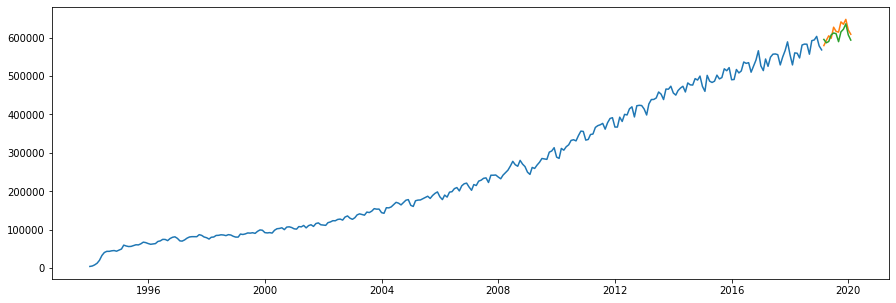

In [55]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test, label= 'Test')
plt.plot(prediction, label = 'Previsão')
plt.show()

In [56]:
from sklearn.metrics import r2_score
test['0'] = prediction
r2_score(test['y'], test['0'])

0.36437232972921807

In [57]:
test = test.drop(columns=['0'])
test

,y
ds,
2019-03-01,579173
2019-04-01,592916
2019-05-01,604607
2019-06-01,598283
2019-07-01,627050
2019-08-01,616158
2019-09-01,614188
2019-10-01,640907
2019-11-01,634654


In [58]:
print(f'RMSE= {mean_squared_error(test, prediction)}')

RMSE= 237255021.85900554
